# **Modelagem 2** 
Analise do modelo 1 e criação do modelo 2.



## **Início**


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold


In [ ]:
#Essa função transforma Female em 1 e Male em 0.
transformar_sexo = lambda valor : 1 if(valor == 'female') else 0
 

## **Modelo 1**

**Preparando os dados**

In [ ]:
#Carregando os dados.
train = pd.read_csv('sample_data/train.csv')

In [ ]:
#Usando a função para transformar texto em número.
train['Sex_binario'] = train['Sex'].map(transformar_sexo)

In [ ]:
#Variáveis do modelo.
variaveis = ['Sex_binario','Age']

In [ ]:
#Selecionando as variáveis. 
X = train[variaveis]
y = train['Survived']

In [ ]:
##Substituindo valores nulos. 
#NaN to -1.
X = X.fillna(-1)

In [ ]:
#Criando a instância do modelo.
modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)

**Validação cruzada**

In [ ]:
#Validação cruzada
resultados_acc= []
kf = RepeatedKFold(n_splits=2,n_repeats=10,random_state= 10)

for linhas_treino, linhas_valid in kf.split(X):
  print("Treino:", linhas_treino.shape[0])
  print("Valid:", linhas_valid.shape[0])
  X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
  y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]

  modelo.fit(X_treino, y_treino)

  pred = modelo.predict(X_valid)
  acc=np.mean(pred==y_valid)
  resultados_acc.append(acc)
  print("Acc:", acc)
  print("="*25)

  

Treino: 445
Valid: 446
Acc: 0.7511210762331838
Treino: 446
Valid: 445
Acc: 0.7617977528089888
Treino: 445
Valid: 446
Acc: 0.7533632286995515
Treino: 446
Valid: 445
Acc: 0.7595505617977528
Treino: 445
Valid: 446
Acc: 0.7690582959641256
Treino: 446
Valid: 445
Acc: 0.7573033707865169
Treino: 445
Valid: 446
Acc: 0.7399103139013453
Treino: 446
Valid: 445
Acc: 0.7595505617977528
Treino: 445
Valid: 446
Acc: 0.7354260089686099
Treino: 446
Valid: 445
Acc: 0.797752808988764
Treino: 445
Valid: 446
Acc: 0.7690582959641256
Treino: 446
Valid: 445
Acc: 0.7640449438202247
Treino: 445
Valid: 446
Acc: 0.7757847533632287
Treino: 446
Valid: 445
Acc: 0.7573033707865169
Treino: 445
Valid: 446
Acc: 0.7556053811659192
Treino: 446
Valid: 445
Acc: 0.7640449438202247
Treino: 445
Valid: 446
Acc: 0.7443946188340808
Treino: 446
Valid: 445
Acc: 0.7595505617977528
Treino: 445
Valid: 446
Acc: 0.7533632286995515
Treino: 446
Valid: 445
Acc: 0.7640449438202247


In [ ]:
resultados_acc

[0.7511210762331838,
 0.7617977528089888,
 0.7533632286995515,
 0.7595505617977528,
 0.7690582959641256,
 0.7573033707865169,
 0.7399103139013453,
 0.7595505617977528,
 0.7354260089686099,
 0.797752808988764,
 0.7690582959641256,
 0.7640449438202247,
 0.7757847533632287,
 0.7573033707865169,
 0.7556053811659192,
 0.7640449438202247,
 0.7443946188340808,
 0.7595505617977528,
 0.7533632286995515,
 0.7640449438202247]

In [ ]:
#Acurácia média do modelo 1
np.mean(resultados_acc)

0.759601451100922

In [ ]:
%matplotlib inline 
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


(array([2., 1., 3., 6., 4., 2., 1., 0., 0., 1.]),
 array([0.73542601, 0.74165869, 0.74789137, 0.75412405, 0.76035673,
        0.76658941, 0.77282209, 0.77905477, 0.78528745, 0.79152013,
        0.79775281]),
 <a list of 10 Patch objects>)

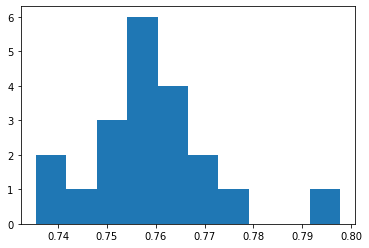

In [ ]:
#Histograma das acurácias.
pylab.hist(resultados_acc)

## **Modelo 2**

In [ ]:
#Carregando os dados.
train = pd.read_csv('sample_data/train.csv')

#Usando a função para transformar texto em número.
train['Sex_binario'] = train['Sex'].map(transformar_sexo)


In [ ]:
#Escolhendo novas variáveis.
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
#Pclass: Classe que o passageiro viajou..
#SibSp: Irmãos / cônjuges a bordo.
#Parch: Pais / filhos a bordo.
#Fare: Valor do bilhete.
variaveis = ['Sex_binario', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare']

In [ ]:
#Tratando as novas entradas.
X = train[variaveis].fillna(-1)
y = train['Survived']

In [ ]:
#Validação cruzada
resultados_acc= []
kf = RepeatedKFold(n_splits=2,n_repeats=10,random_state= 10)

for linhas_treino, linhas_valid in kf.split(X):
  print("Treino:", linhas_treino.shape[0])
  print("Valid:", linhas_valid.shape[0])
  X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
  y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]

  modelo.fit(X_treino, y_treino)

  pred = modelo.predict(X_valid)
  acc=np.mean(pred==y_valid)
  resultados_acc.append(acc)
  print("Acc:", acc)
  print("="*25)


Treino: 445
Valid: 446
Acc: 0.7869955156950673
Treino: 446
Valid: 445
Acc: 0.7797752808988764
Treino: 445
Valid: 446
Acc: 0.827354260089686
Treino: 446
Valid: 445
Acc: 0.8179775280898877
Treino: 445
Valid: 446
Acc: 0.7847533632286996
Treino: 446
Valid: 445
Acc: 0.7842696629213484
Treino: 445
Valid: 446
Acc: 0.8161434977578476
Treino: 446
Valid: 445
Acc: 0.7842696629213484
Treino: 445
Valid: 446
Acc: 0.8004484304932735
Treino: 446
Valid: 445
Acc: 0.8
Treino: 445
Valid: 446
Acc: 0.8183856502242153
Treino: 446
Valid: 445
Acc: 0.802247191011236
Treino: 445
Valid: 446
Acc: 0.8116591928251121
Treino: 446
Valid: 445
Acc: 0.8067415730337079
Treino: 445
Valid: 446
Acc: 0.820627802690583
Treino: 446
Valid: 445
Acc: 0.7887640449438202
Treino: 445
Valid: 446
Acc: 0.8385650224215246
Treino: 446
Valid: 445
Acc: 0.8044943820224719
Treino: 445
Valid: 446
Acc: 0.7982062780269058
Treino: 446
Valid: 445
Acc: 0.8112359550561797


Populating the interactive namespace from numpy and matplotlib


(array([4., 2., 0., 4., 2., 2., 4., 0., 1., 1.]),
 array([0.77977528, 0.78565426, 0.79153323, 0.7974122 , 0.80329118,
        0.80917015, 0.81504913, 0.8209281 , 0.82680707, 0.83268605,
        0.83856502]),
 <a list of 10 Patch objects>)

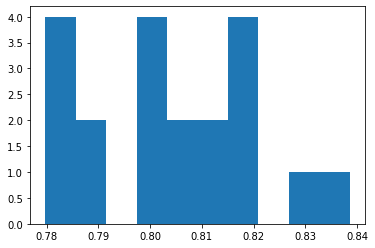

In [ ]:
%matplotlib inline 
%pylab inline 
#Histograma das acurácias.
pylab.hist(resultados_acc)

In [ ]:
#Acurácia média do modelo 2.
np.mean(resultados_acc)

0.8041457147175896

**Retreinando o modelo com todos os dados.**

In [ ]:
#Carregando os dados.
train = pd.read_csv('sample_data/train.csv')
test = pd.read_csv('sample_data/test.csv')

#Usando a função para transformar texto em número.
train['Sex_binario'] = train['Sex'].map(transformar_sexo)
test['Sex_binario'] = test['Sex'].map(transformar_sexo)

#Tratando as novas entradas
X = train[variaveis].fillna(-1)
X_prev = test[variaveis].fillna(-1)
y = train['Survived']

In [ ]:
modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
modelo.fit(X, y)
pred = modelo.predict(X_prev)
pred

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

## **Criando submission**

In [ ]:
# Salvando os dados no formato csv.
sub = pd.Series(pred, index=test['PassengerId'], name='Survived')
sub.to_csv('my_submissions/segundo_modelo.csv', header= True)


In [ ]:
#
!head -n10 'my_submissions/segundo_modelo.csv'

PassengerId,Survived
892,0
893,0
894,1
895,1
896,0
897,0
898,0
899,0
900,1
